# Step 1: Setup Google Colab Notebook

## 1.1 Import and Install all Libraries

In [ ]:
# Install required libraries (If needed)
!pip install pandas numpy matplotlib seaborn --quiet

# Import core libraries
## Pandas for handling tabular data (like Excel sheets in Python)
## Numpy for for fast numerical calculations
## matplotlib and seaborn for making graphs and charts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup for plots
sns.set(style='whitegrid')

## 1.2 Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving phishing.csv to phishing.csv


## 1.3 Load & Preview the Datasets

In [ ]:
# Load CSV (change filename if different)
df = pd.read_csv('phishing.csv')

# Preview the first few rows
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 1.4 Basic Info & CleanUp

In [ ]:
# Check Structure
df.info()

# Check Columns - Feature Extraction
df.columns

# Check for missing values
df.isnull().sum()

# Dataset Shape
print("Dataset Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

## 1.5 Visualize Class Distribution

/tmp/ipython-input-8-1220607832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


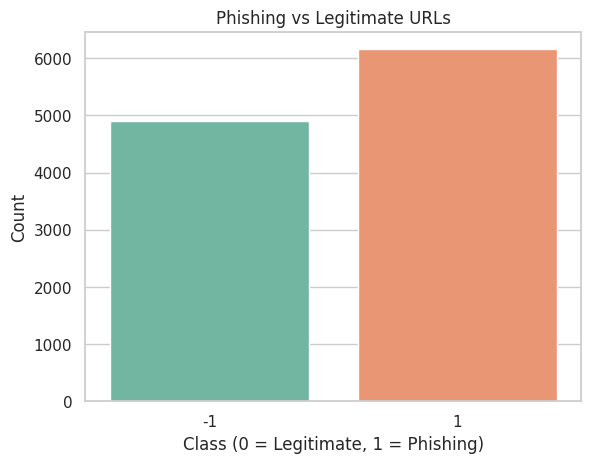

In [ ]:
# Creates a bar chart showing how many phishing vs legitimate URLs there are
sns.countplot(x='class', data=df, palette='Set2')

# Adds a title and labels to make the chart clear
plt.title("Phishing vs Legitimate URLs")
plt.xlabel("Class (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.show()


# Step 2: Data Preparation & Feature Selection

## 2.1 Drop Unnecessary Columns

In [ ]:
# Drop the index column coz it only contains row counts
df.drop('Index', axis=1, inplace=True)

## 2.2 Separate Features (X) and Target (y)

In [ ]:
# Separate Features and Target to tell the model what to learn from
# This line creates X that does not contain 'class' the Target
# X is input data and y is output data
X = df.drop('class',axis=1)
y = df['class']

## 2.3 Check for class balance to avoid balance

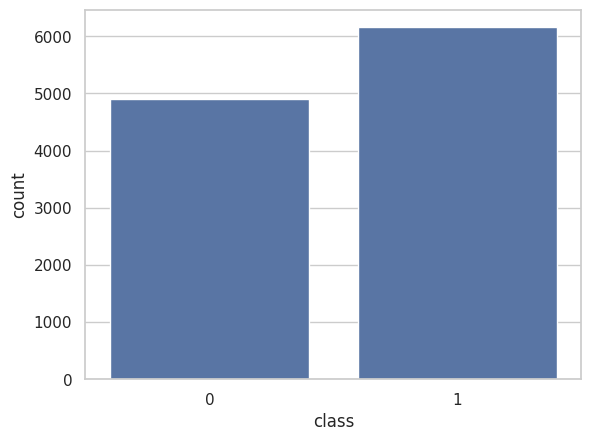

In [ ]:
# Creates a bar chart that shows how many samples are legitimate (class 0), phishing (class 1)
# To check if the classes are balanced.
# If one class has way more samples than the other, the model could become biased.It is balanced.
sns.countplot(x=y)
# Replaces -1 to 0.
y = y.replace(-1, 0)

## 2.4 Split the data into Training and Testing

In [ ]:
#Imports a tool from scikit-learn that helps us split our data into training and testing parts
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (8843, 30)
Testing set size: (2211, 30)


# Step 3: Train Random Forests Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_preds = rf_model.predict(X_test)

# Print the results
print("📊 Random Forest Results:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

📊 Random Forest Results:
[[ 940   39]
 [  19 1213]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       979
           1       0.97      0.98      0.98      1232

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



# step 4: Train an XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metrics='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_preds = xgb_model.predict(X_test)

# Print results
print("📊 XGBoost Results:")
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:04:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 XGBoost Results:
[[ 938   41]
 [  24 1208]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       979
           1       0.97      0.98      0.97      1232

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



# Step 5: Compare Model Metrics on Bar Chart

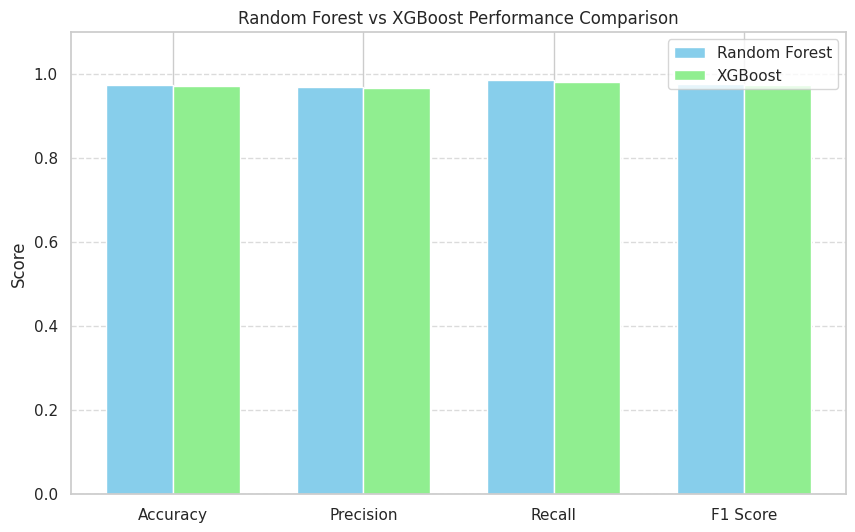

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Random Forest
rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

# Calculate metrics for XGBoost
xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_prec = precision_score(y_test, xgb_preds)
xgb_rec = recall_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)

# Labels and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_values = [rf_acc, rf_prec, rf_rec, rf_f1]
xgb_values = [xgb_acc, xgb_prec, xgb_rec, xgb_f1]

x = np.arange(len(metrics))
width = 0.35

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rf_values, width, label='Random Forest', color='skyblue')
plt.bar(x + width/2, xgb_values, width, label='XGBoost', color='lightgreen')

# Add labels and legend
plt.ylabel('Score')
plt.title('Random Forest vs XGBoost Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Step 6: Save the Best Model (Random Forests Classifier)


In [ ]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

## 6.1 Download the .pkl File to Your Computer

In [ ]:
from google.colab import files
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>